# Code Challenge XIBIX

## Try to read data from Json

In [3]:
class Mesh(object):
    def __init__(self):
        self.nodes = {}
        self.values = {}
        self.elements = {}
        
    def get_nodes(self):
        return self.nodes
    
    def get_values(self):
        return self.values
    
    def get_elements(self):
        return self.elements


## Function to read data from Json

In [7]:
def read_json_mesh_file(json_file):
    """reads json file and returns dictionaries of nodes, elements and values
    
    Args:
        json_file: file containing json data
        
    Returns:
        mesh: Mesh object
    """
    import mesh
    import json
 
    # Opening JSON file
    f = open(json_file)

    # returns JSON object as
    # a dictionary
    data = json.load(f)

    mesh = Mesh()
    mesh.nodes = data['nodes']
    mesh.elements = data['elements']
    mesh.values = data['values']

    # Closing file
    f.close()
    
    return mesh

## Read data

In [8]:
mesh = read_json_mesh_file('mesh.json')
#mesh = read_json_mesh_file('mesh_x_sin_cos_10000.json')

# nodes:
# {"id": 0,"x": 0.0, "y": 0.0}
# {"id": 1,"x": 0.0, "y": 1.0}
# {"id": 12,"x": 1.0,"y": 1.0}

# elements:"id": 0, "nodes": [0,1,12]

# "values": [{ "element_id": 0, "value": 0.15154957113761364 }

## Test: Draw triangle outlines

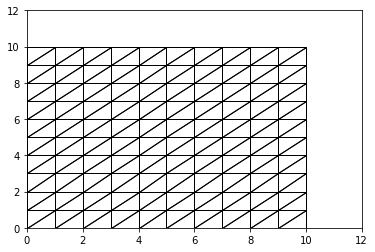

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

elements = mesh.get_elements()
nodes = mesh.get_nodes()

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
        
    #print(coordinates)
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, fill=None)
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

plt.show()

## Test: Draw triangles with color map based on element value
local maxima are blue

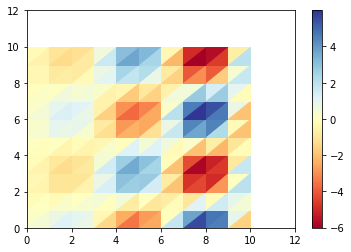

In [18]:
elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

fig= plt.figure()
ax= fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    #print value
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    #print(coordinates)
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()

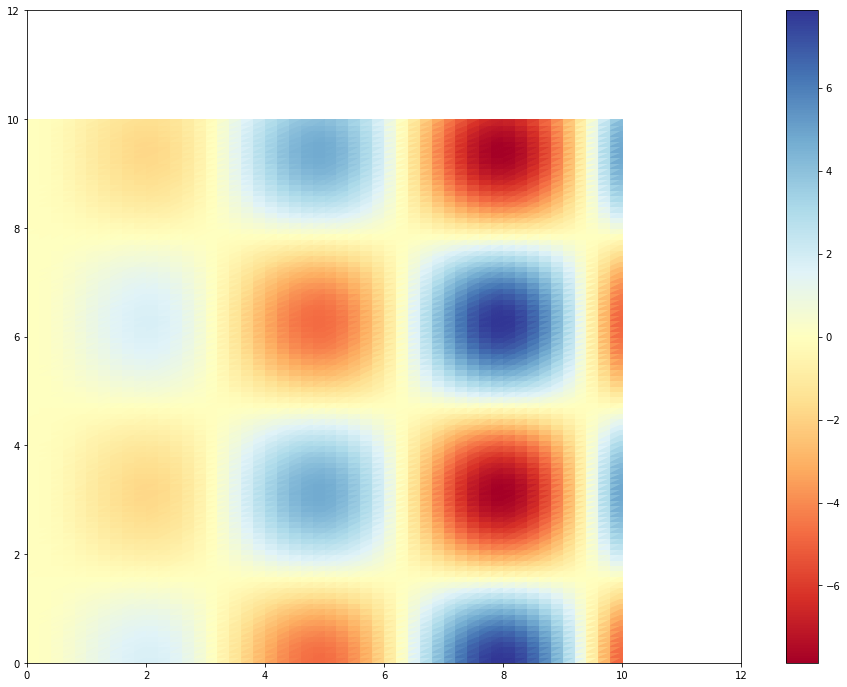

In [19]:
mesh = read_json_mesh_file('mesh_x_sin_cos_10000.json')

elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    #print value
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    #print(coordinates)
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()

In [115]:
elements[:10]

[{'id': 0, 'nodes': [0, 1, 102]},
 {'id': 1, 'nodes': [0, 101, 102]},
 {'id': 2, 'nodes': [1, 2, 103]},
 {'id': 3, 'nodes': [1, 102, 103]},
 {'id': 4, 'nodes': [2, 3, 104]},
 {'id': 5, 'nodes': [2, 103, 104]},
 {'id': 6, 'nodes': [3, 4, 105]},
 {'id': 7, 'nodes': [3, 104, 105]},
 {'id': 8, 'nodes': [4, 5, 106]},
 {'id': 9, 'nodes': [4, 105, 106]}]

In [116]:
values[:5]

[{'element_id': 0, 'value': 0.013178454110272261},
 {'element_id': 1, 'value': 0.026423076163276344},
 {'element_id': 2, 'value': 0.01298061141028835},
 {'element_id': 3, 'value': 0.026159065520560614},
 {'element_id': 4, 'value': 0.012653070731912497}]

In [117]:
nodes[:5]

[{'id': 0, 'x': 0.0, 'y': 0.0},
 {'id': 1, 'x': 0.0, 'y': 0.1},
 {'id': 2, 'x': 0.0, 'y': 0.2},
 {'id': 3, 'x': 0.0, 'y': 0.30000000000000004},
 {'id': 4, 'x': 0.0, 'y': 0.4}]

In [120]:
list_new = [ ele['id'] for ele in elements if ( 102 in ele['nodes'])]
list_new

[0, 1, 3, 200, 202, 203]

In [124]:
values_new = [ val['value'] for  val in values if (val['element_id'] in list_new)]
values_new

[0.013178454110272261,
 0.026423076163276344,
 0.026159065520560614,
 0.07808612584764586,
 0.07704651913323372,
 0.11572895740731488]

In [133]:
value_node =[ val['value'] for  val in values if (val['element_id'] == 102)][0]
value_node

0.006205326236905039

In [134]:
all(value_node > a for a in values_new)

False

In [66]:
def isclose(a, b, rel_tol=1e-04, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

In [75]:
# %%timeit

# 'mesh.json': 16.9 ms ± 480 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# 'mesh_x_sin_cos_10000.json': 37.7 s ± 851 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

#first experiment
mesh = read_json_mesh_file('mesh.json')
#mesh = read_json_mesh_file('mesh_x_sin_cos_10000.json')
#mesh = read_json_mesh_file('mesh_x_sin_cos_20000.json')

elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

# {element_id: element_id1, value: <number value>},
spots = []

for element in elements:
    
    # get element_id
    id = element['id']
    
    # get nodes from element
    element_nodes = element['nodes']
    #print(element_nodes)
    
    # for each of 3 nodes find neigbors = element IDs; append all in one list
    list_all_new = []
    for en in element_nodes:
        list_new = [ ele['id'] for ele in elements if ( en in ele['nodes'])]
        list_all_new=list(set().union(list_all_new,list_new))
    
    list_all_new.remove(id)
    
    #print(id, list_all_new)
    
    # get values for element IDs in second list
    values_new = [ val['value'] for  val in values if (val['element_id'] in list_all_new)]
    #print(values_new)
    
    # compare value in element to all neigbor values
    value_node =[ val['value'] for  val in values if (val['element_id'] == id)][0]
    
    # remember element and neighbors in list only if all(value_node > a for a in values_new) == True
    #if (all(value_node > a for a in values_new)):
    #    print(id, ' ', value_node, values_new)
    
    if (value_node > max(values_new)):
        # print(id, ' ', value_node)
        spot = {'element_id': id, 'value': value_node}
        spots.append(spot)
    else :
        if (isclose(value_node, max(values_new))):
            print('2: ', id, ' ', value_node)

sorted_spots = sorted(spots, key=lambda d: d['value'], reverse=True) 
print(sorted_spots)
    #print(value_node, values_new)
    #print(id, list_all_new)
    #special = [198, 4001, 4124, 9789, 9862, 9988, 15801, 15924, 19863, 19989]

[{'element_id': 153, 'value': 5.99412916855438}, {'element_id': 141, 'value': 5.59673083328692}, {'element_id': 99, 'value': 3.7165791791790643}, {'element_id': 87, 'value': 3.6258426752667208}, {'element_id': 199, 'value': 2.047341538506613}, {'element_id': 185, 'value': 2.0353928618660895}, {'element_id': 33, 'value': 1.3083863128423896}, {'element_id': 21, 'value': 1.2142189437756745}, {'element_id': 18, 'value': -0.23535144863207666}]


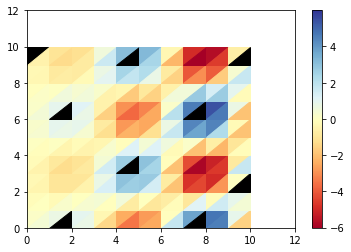

In [54]:
elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

fig= plt.figure()
ax= fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    #print value
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    # color maxima black
    special = [18, 21, 33, 87, 99, 141, 153, 185, 199]
    if (element['id'] in special):
        color = 'black'
    
    #print(coordinates)
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

    
#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()

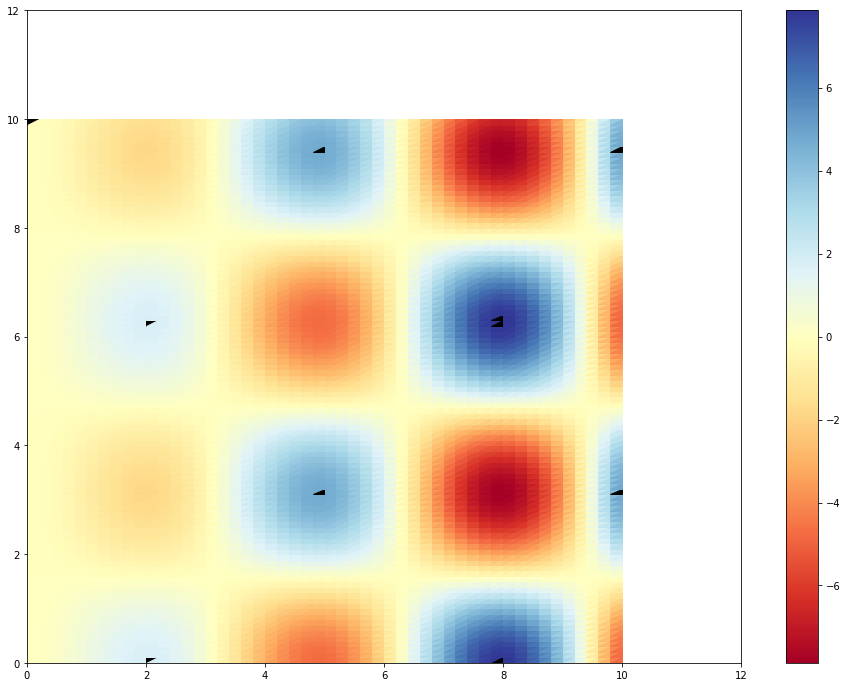

In [56]:
mesh = read_json_mesh_file('mesh_x_sin_cos_10000.json')

elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    #print value
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    # color maxima black
    special = [198, 2000, 2124, 4863, 4989, 7801, 7925, 7927, 9863, 9989]
    if (element['id'] in special):
        color = 'black'
    
    #print(coordinates)
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()

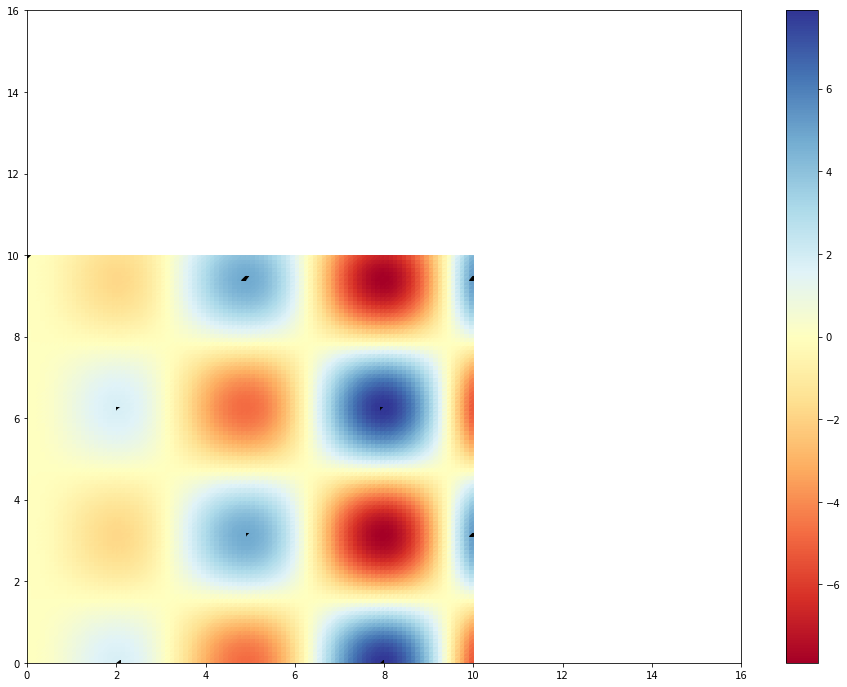

In [68]:
mesh = read_json_mesh_file('mesh_x_sin_cos_20000.json')

elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    #print value
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    # color maxima black
    #special = [198, 4001, 4124, 9862, 9988, 15801, 15924, 19863, 19989]
    special = [198, 4001, 4124, 9789, 9862, 9988, 15801, 15924, 19863, 19989]
    if (element['id'] in special):
        color = 'black'
    
    #print(coordinates)
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,16)
    ax.set_ylim(0,16)

#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()